<h1><center>Five Card Tricks in Blackjack: A Monte Carlo Simulation</center></h1>

## Introduction

Blackjack (or "21") is one of the most universally well-known card game, consisting of two to seven players and a dealer who can use up to eight decks of cards (each deck consists of 52 cards). Every card is assigned a numerical value equal to the number on the card, whereas Jacks, Queens and Kings are counted as 10, and Aces can be chosen as 1 or 11 depending on the player. The goal is to get a value higher than the dealer, while not going over 21 (or going bust). All players are initially dealt 2 cards, which they can view and decide on whether to draw another card. Each player can draw a maximum of 3 cards, meaning the most number of cards in a hand is 5.

A "Five Card Trick" (also referred to as "Five Dragons" in some Asian cultures) happens when a player has a 5-card hand that does not go bust. When a player gets a Five Card Trick, they automatically win the game, and the dealer has to pay them their dues. However, this is often considered as an uncommon event, considering the challenge of keeping one's hand below 21.

Is it that uncommon? What is the probability of a game of Blackjack resulting in a Five Card Trick? Using the Monte Carlo simulation and some simplifying assumptions, this document aims to answer these questions.

## Assumptions

A game in Blackjack in real life depends on many factors that can heavily affect the realistic probabilities of getting a Five Card Trick. In this document, we use some assumptions to simplify our simulation. Therefore, one should not take these results as a realistic probability of getting a Five Card Trick in Blackjack.

The assumptions are as followed:
- The cards are completely randomly shuffled and dealt.

- Only one deck of cards (52 cards in total) is used.

- All players stop drawing once their hands reach a certain value (referred to as "exit value").

- The decisions of players are solely based on their hand value, and independent on other players or the dealer.

- The dealer is considered as one of the players.

- No weights are given to the number of cards that each player has.

- There is no money or incentives that may influence the players' decisions.

## Libraries and Functions

We use tidyverse and dplyr for data wrangling, and ggplot2 and ggthemes for our visualizations. A total of 5 functions are created: 
- **set_deck( )**: returns a vector of all 52 cards in a deck, and will be used to reset the deck when needed. 

- **value(x)**: returns the total value of a hand x by converting the card names to numeric values. 

- **play(np)**: create an empty dataframe for all "np" players, which is to be updated with simind(np, exit).

- **sim(np, exit)**: takes input "np" (number of players), and "exit" (value of hand at which player stops drawing), and returns TRUE if there is a Five Card Trick in the game, FALSE otherwise.

- **simind(np, exit)**: updates a dataframe created with play(np) to include TRUE if a player has a Five Card Trick, and FALSE otherwise.

In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(ggthemes)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
numbers <- 
c("Ace", "Deuce", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Ten", "Jack", "Queen", "King")
suits <- c("Spades", "Clubs", "Diamonds", "Hearts")
#Set plot width
options(repr.plot.width = 15)

In [3]:
#Create deck
set_deck <- function(){    
    deck <- expand.grid(number = numbers, suit = suits)
    deck <- paste(deck$number, deck$suit)
    return(deck)
}

In [4]:
#Calculate hand value
value <- function(x){
    for(i in 1:length(x)){
        if (x[i]%in%paste("Ace", suits)){
          x[i] <- 1
        } else if (x[i]%in%paste("Deuce", suits)){
          x[i] <- 2
        } else if (x[i]%in%paste("Three", suits)){
          x[i] <- 3
        } else if (x[i]%in%paste("Four", suits)){
          x[i] <- 4
        } else if (x[i]%in%paste("Five", suits)){
          x[i] <- 5
        } else if (x[i]%in%paste("Six", suits)){
          x[i] <- 6
        } else if (x[i]%in%paste("Seven", suits)){
          x[i] <- 7
        } else if (x[i]%in%paste("Eight", suits)){
          x[i] <- 8
        } else if (x[i]%in%paste("Nine", suits)){
          x[i] <- 9
        } else if (is.na(x[i])){
          x[i] <- 0
        } else {
          x[i] <- 10
        }
    }
    x <- as.integer(x)
    return(sum(x))
}

In [5]:
play <- function(np){
    players <- data.frame(matrix(ncol = np))
    colnames(players) <- c(paste("p", 1:np, sep = ""))
    players <- players[-1,]
    return(players)
}

In [6]:
#Simulation function
sim <- function(np, exit){
    deck <- set_deck()
    hands <- data.frame(matrix(ncol = np))
    bj <- vector(len = np)
    #First round
    for (i in 1:np){
        p <- sample(deck, 2)
        deck <- deck[which(!deck%in%p)]
        hands[c(1:length(p)), i] <- p
        bj[i] <- ifelse(
            value(p) == 11 & 
            any(p%in%paste("Ace", suits)),
            21, 0
        )
    }
    #Other rounds
    for(n in 3:5){
        for(i in 1:np){
            d <- ifelse(
                value(hands[,i]) <= exit & 
                bj[i] != 21, 
                sample(deck, 1), NA
            )
            deck <- deck[which(!deck%in%d)]
            hands[n, i] <- d
        }
    }
    #total_value table
    total_value <- sapply(hands, value)
    
    #check
    five_dragons <- any(total_value <= 21 & !apply(hands, 2, function(x) any(is.na(x))))
    return(five_dragons)
}

In [7]:
simind <- function(np, exit){
    deck <- set_deck()
    hands <- data.frame(matrix(ncol = np))
    names(hands) <- c(paste("p", 1:np, sep = ""))
    bj <- vector(len = np)
    #First round
    for (i in 1:np){
        p <- sample(deck, 2)
        deck <- deck[which(!deck%in%p)]
        hands[c(1:length(p)), i] <- p
        bj[i] <- ifelse(
            value(p) == 11 & 
            any(p%in%paste("Ace", suits)),
            21, 0
        )
    }
    #Other rounds
    for(n in 3:5){
        for(i in 1:np){
            d <- ifelse(
                value(hands[,i]) <= exit & 
                bj[i] != 21, 
                sample(deck, 1), NA
            )
            deck <- deck[which(!deck%in%d)]
            hands[n, i] <- d
        }
    }
    #total_value table
    total_value <- sapply(hands, value)

    #check
    five_dragons <- total_value <= 21 & !apply(is.na(hands), 2, any)
    players[nrow(players) + 1, ] <- five_dragons
    return(players)
}

## Monte Carlo Simulation

A Five Card Trick is often considered a rare occasion in Blackjack. Those who occasionally play the game might have never seen such event happening before. Is it truly that rare? What are the chances of a game having a Five Card Trick?

We run a Monte Carlo Simulation to attempt to answer these questions. The simulation returns two dataframes, df_total and df_ind. 
- **df_total** collects entries with np (number of players), mean (probability of a Five Card Trick) and exit (value at which the player stops drawing). This table is used to analyze the probability of a Five Card Trick in a game of Blackjack.
- **df_ind** collects entries with player (individual players), avg (probability of a Five Card Trick) and np (number of players in that game). This table is used to analyze the probability of a Five Card Trick for each individual players.

<u>Note</u>: In this document, we use 2,000 repetitions for df_total, and 10,000 repetitions for df_ind. With multiple for loops, the simulation can repeat up to 15,000 times. Hence increasing these numbers might be too heavy for our computer's programming power. Also, we have found that there is not much noticeable differences when we increase the tries to 20,000 or 50,000 for previous trials. You can adjust the number of trials by changing the values of B below, where the first value is for df_total, and the second is for df_ind.

Moreover, we make an assumption of players using the strategy of exiting given a certain value on their hands. In reality, this assumption can be quite accurate, especially for those who are unfamiliar Blackjack probabilities or card counting.

In [8]:
np <- c(2,4,6,8)
exit <- 15:21
B <- c(2000, 10000)

In [9]:
df_total <- data.frame(
  np = character(),
  mean = numeric(),
  exit_value = numeric(),
  stringsAsFactors = FALSE
)

df_ind <- data.frame(
    player = character(),
    avg = numeric(),
    np = character(),
    stringsAsFactors = FALSE
)

In [10]:
#Monte Carlo Simulation
for (i in exit){
    for(j in np){
        if (i == 21 & j != 2){
            total <- c()
            players <- play(j)
            for (b in 1:B[2]){
                if (b <= B[1]){
                    t <- sim(j, i)
                    total <- c(total, t)
                    players <- simind(j, i)
                }
                else {
                    players <- simind(j, i)
                }
                
            }
            avg_total <- mean(total) * 100
            df_total[nrow(df_total)+1,] <- c(j, avg_total, i)
            avg_ind <- colMeans(players) * 100
            for (n in names(avg_ind)){
                df_ind[nrow(df_ind)+1,] <- c(n, avg_ind[n], paste(j, "players"))
            }
        }
        else {
            total <- c()
            for (b in 1:B[1]){
                t <- sim(j, i)
                total <- c(total, t)
            }
            avg_total <- mean(total) * 100
            df_total[nrow(df_total)+1,] <- c(j, avg_total, i)
        }
    }
}

In [11]:
df_total

,np,mean,exit_value
,<chr>,<dbl>,<dbl>
1,2,5.50,15
2,4,11.60,15
3,6,15.30,15
4,8,20.25,15
5,2,6.25,16
6,4,13.85,16
7,6,17.55,16
8,8,24.15,16
9,2,6.95,17


In [12]:
df_ind

,player,avg,np
,<chr>,<chr>,<chr>
1,p1,5.16,4 players
2,p2,5.37,4 players
3,p3,5.4,4 players
4,p4,5.45,4 players
5,p1,5.33,6 players
6,p2,5.4,6 players
7,p3,5.35,6 players
8,p4,5.03,6 players
9,p5,5.26,6 players


## How Often Does a Five Card Trick Happen?

So how often does a Five Card Trick happen in Blackjack? We create a lined graph using data generated by the Monte Carlo Simulation of 2,000 repetitions to find the different probabilities of this event at different number of players and exit strategies. The answer might be surprising to some.

Under the assumptions that cards are completely randomly dealt and all players in a game stop drawing at the same hand value, the chances of a Five Card Trick increases with the number of players as well as the exit value. This is rather not surprising because the more players there are, the more likely a game will have a Five Card Trick. Similarly, if players keep drawing until their hands reach 21, the chances of getting a Five Card Trick is also higher compared to a lower exit value.

However, according to the graph below, if 8 players all choose an exit value of 21 (i.e. they keep drawing until they have 21 or higher), the chances of a Five Card Trick is almost **40%**. That is 2 games out of 5! Even if they all choose an exit value of 15 (which is a realistic amount as it is the lowest value that is safe), there is still a **20%** chance of a Five Card Trick happening, or 1 out of 5 games!

One thing that is quite non-intuitive is that the optimal strategy based on this graph is to stop drawing only once one has reached 21 points. Many Blackjack players often adopt a strategy of exiting at around 15 to 18, as they deem it safe enough to proceed. This is understandable because the former strategy is only optimal if the goal is to aim for a Five Card Trick, whereas in reality, most players use a strategy that helps them beat the dealer, hence the latter.

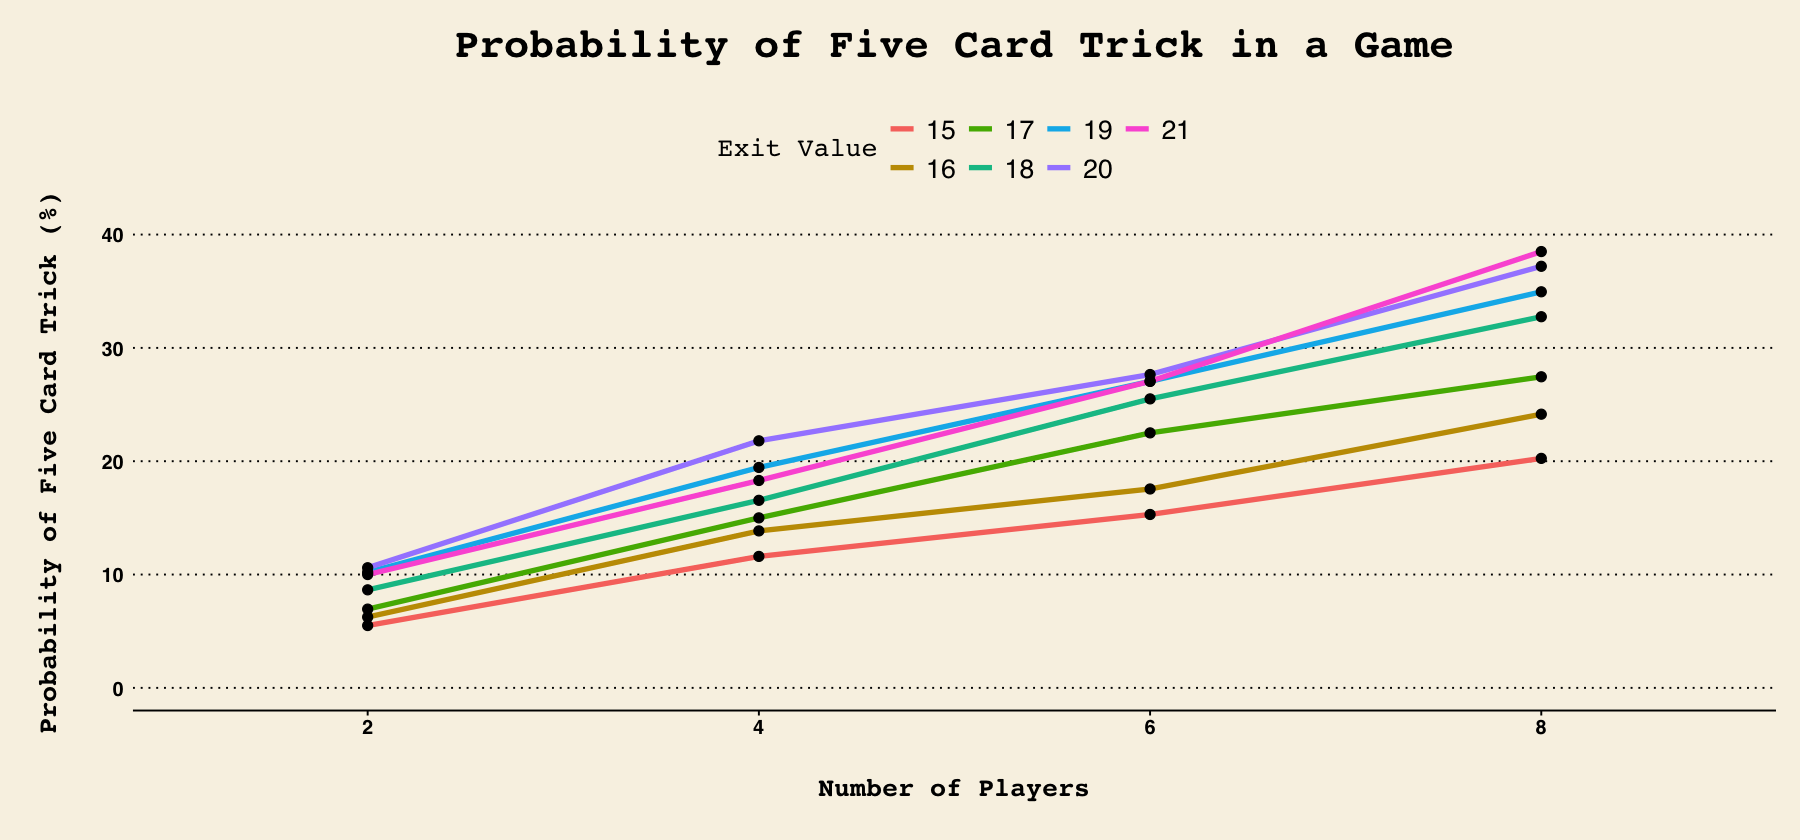

In [13]:
df_total %>% ggplot(aes(x = np, y = mean, group = factor(exit_value))) + 
geom_line(aes(color = factor(exit_value)), linewidth = 1.5) + 
geom_point(size = 2.5) +
ggtitle("Probability of Five Card Trick in a Game") +
xlab("Number of Players") + ylab("Probability of Five Card Trick (%)") +
labs(color='Exit Value')  +
scale_y_continuous(limit = c(0, 40), breaks = seq(0, 40, 10)) +
theme_wsj() +
theme(plot.title = element_text(size = 25, margin = margin(b = 25, t = 5),
                               hjust = 0.5),
      legend.text = element_text(size = 16),
      legend.title = element_text(size = 16),
      axis.text = element_text(size = 12),
      axis.title.y = element_text(size = 16, face = "bold", 
                                  margin = margin(r = 25, l = 10)),
      axis.title.x = element_text(size = 16, face = "bold", 
                                  margin = margin(t = 25, b = 10))
     )

## Individual Analysis - Does Order Matter?

We now know that there can be up to a 40% chance of a Five Card Trick happenning in a game of Blackjack. What about the odds of each individual player coming across this lucky hand? To answer this we create 3 bar plots using data from df_ind (Monte Carlo simulation of 10,000 repetitions). We want to see if the number of players and the order in which one goes affect their chances of getting a Five Card Trick. We assume here that every player stops drawing cards at hand values of 21 or higher.

The graph shows that although there are some variability, most players get around a **5% chance** of getting a Five Card Trick, regardless of the size of the player pool, or the order in which they are dealt. This may come as a surprise to some, but it illustrates that the odds for each player in a fair game of Blackjack is relatively independent of other players.

It is worth noting that there are still some discrepancies between the values (with differences of about +/- 0.2% from 5%) even when the number of trials for the Monte Carlo Simulation goes up to 50,000. This can either mean that 50,000 tries is still not enough to estimate the true probability, or there are some other factors that create some randomness in these values.

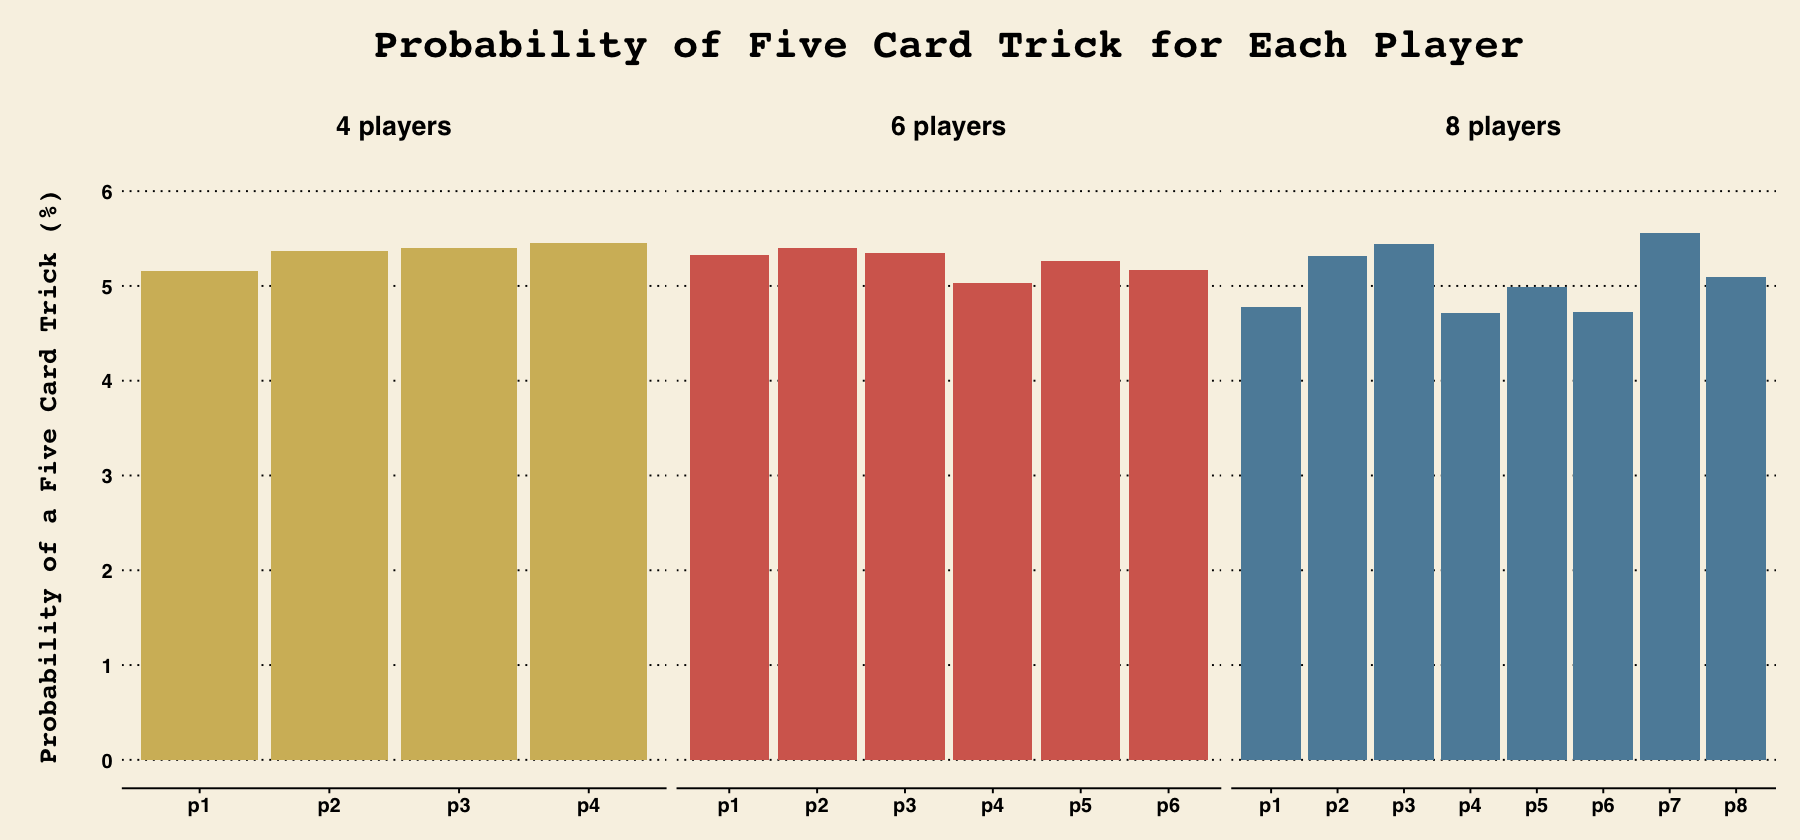

In [14]:
df_ind %>% mutate(avg = as.numeric(avg)) %>% group_by(np) %>% 
ggplot(aes(x = factor(player), y = avg, fill = factor(np))) +
geom_col() +
scale_fill_wsj(palette = "rgby") +
scale_color_wsj(palette = "rgby") +
theme(panel.spacing = unit(6, "lines")) +
scale_y_continuous(limits = c(0, 6), breaks = seq(0, 6, 1)) + 
facet_grid(.~factor(np), scales = "free") +
ggtitle("Probability of Five Card Trick for Each Player") +
xlab("") + ylab("Probability of a Five Card Trick (%)") +
theme_wsj() +
theme(plot.title = element_text(size = 25, margin = margin(b = 20, t = 5),
                               hjust = 0.5),
      strip.text.x = element_text(size = 16, face = "bold",
                             margin = margin(b = 15, t = 10)),
      axis.title.y = element_text(size = 16, face = "bold",
                             margin = margin(r = 25, l = 10)),
      legend.position = "none"
    )

## Conclusion

Blackjack is a well-known card game, and a Five Card Trick is often considered a rare occurence in the game. However, under the right circumstances, this probability is surprisingly high, as shown in a Monte Carlo simulation. With that being said, the simulation runs under some unrealistic assumptions, and hence the actual probability of this event can be significantly in reality.